<a href="https://colab.research.google.com/github/YamRub/applied-data-science-capstone/blob/master/Tastk%202%20Student%20Spark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
#Manditory Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Loading data from **ULR**

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Plot the graphe for hr and score

Text(0, 0.5, 'PERCENT SCORE')

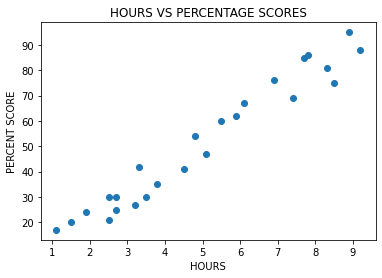

In [3]:
plt.scatter(data['Hours'],data['Scores'])
plt.title("HOURS VS PERCENTAGE SCORES")
plt.xlabel("HOURS",fontsize = 10)
plt.ylabel("PERCENT SCORE",fontsize = 10)

Regression Graphe

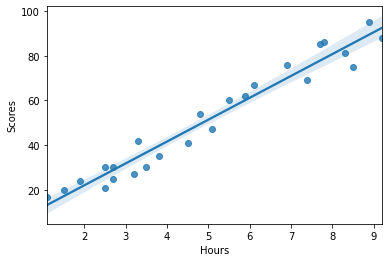

In [4]:
sns.regplot(data['Hours'],data['Scores'])

Assigning values and spliting data into train and **test**

In [5]:
x = data.iloc[:,:-1].values
y = data.iloc[:,1].values

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .20, random_state = 0)

**model** and **fit**

In [7]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression() #creating linear regression variable
model_lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((20, 1), (5, 1), (20,), (5,))

In [9]:
x_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [10]:
y_test

array([20, 27, 69, 30, 62])

Predict Y for xtest

In [11]:
y_pred = model_lr.predict(x_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

**Comparing actual Vs predicted**

In [12]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**What will be predicted score if a student study for 9.25 hrs in a day?**

In [13]:
y_at_any_value =  model_lr.predict([[9.25]])
y_at_any_value

array([93.69173249])

**if a student studies do 9.25 hrs a day the predicticted score of the student will be 93.69 percent**


Evaluting Model Performance

In [14]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test,y_pred)
r2_squared = r2_score(y_test, y_pred)

In [15]:
from math import sqrt
rmse = sqrt(mse)

In [17]:
print('mean_squared_error  :',mse)
print('Root Mean Square Error :',rmse)
print('r2_score  :',r2_squared)

mean_squared_error  : 21.598769307217456
Root Mean Square Error : 4.647447612100373
r2_score  : 0.9454906892105354
